The information of data: 
        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

 

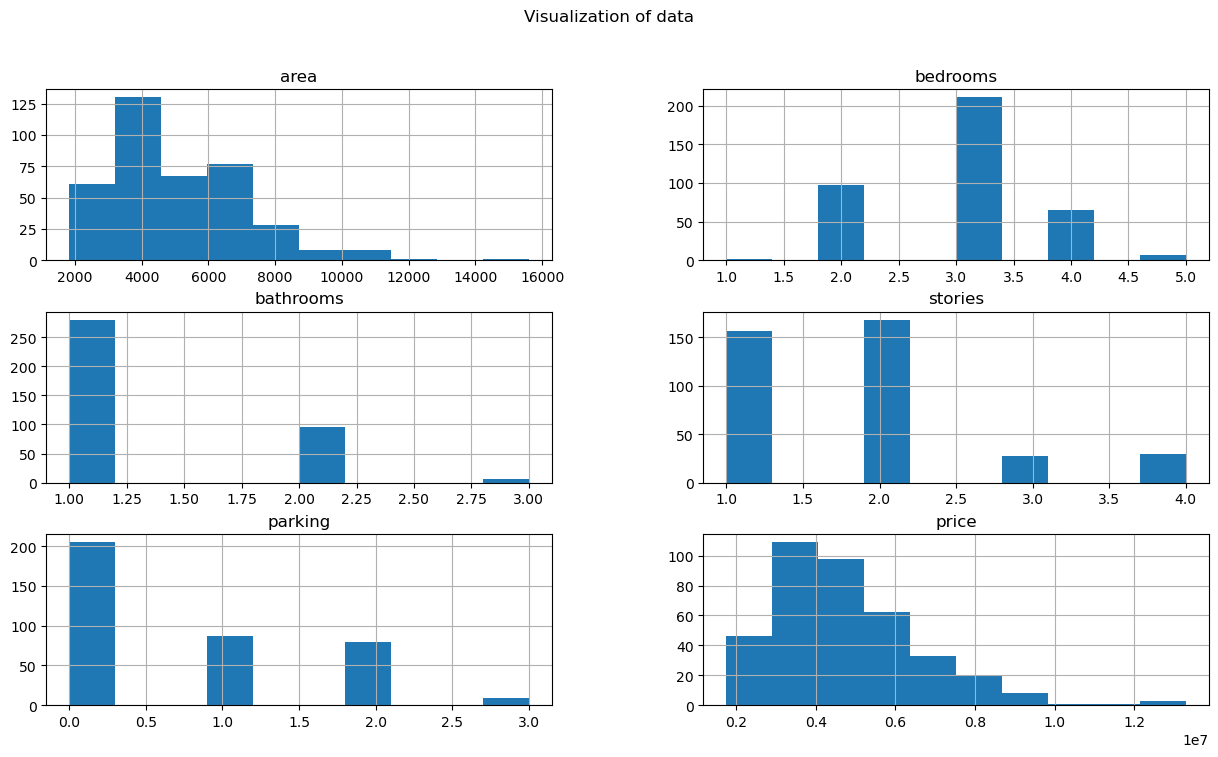

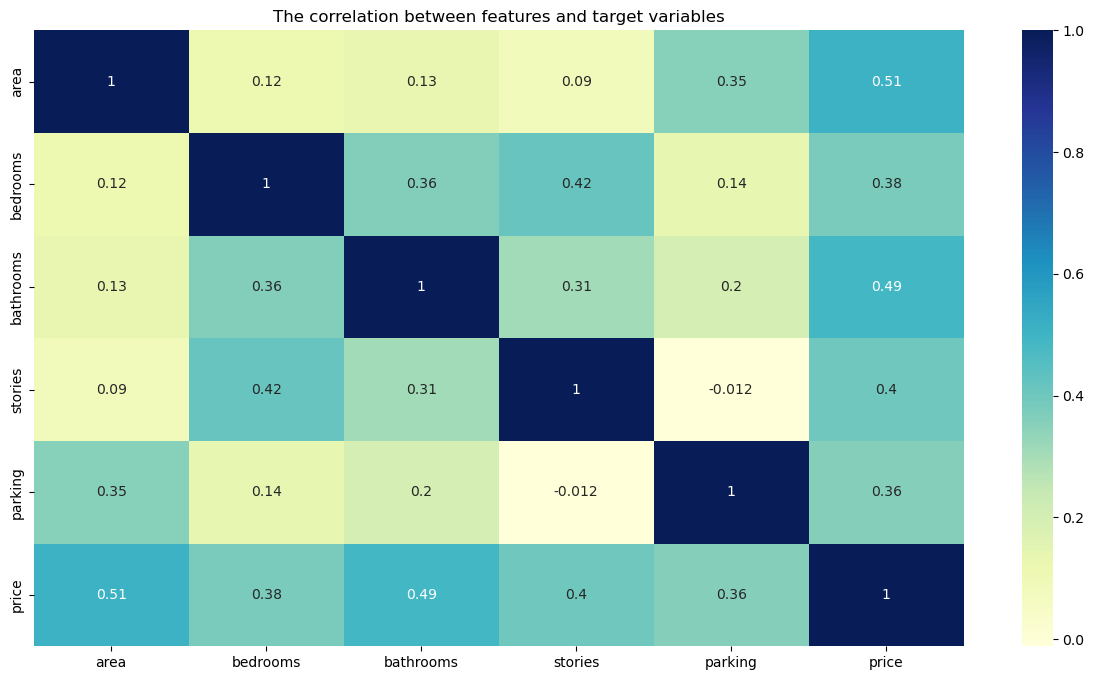

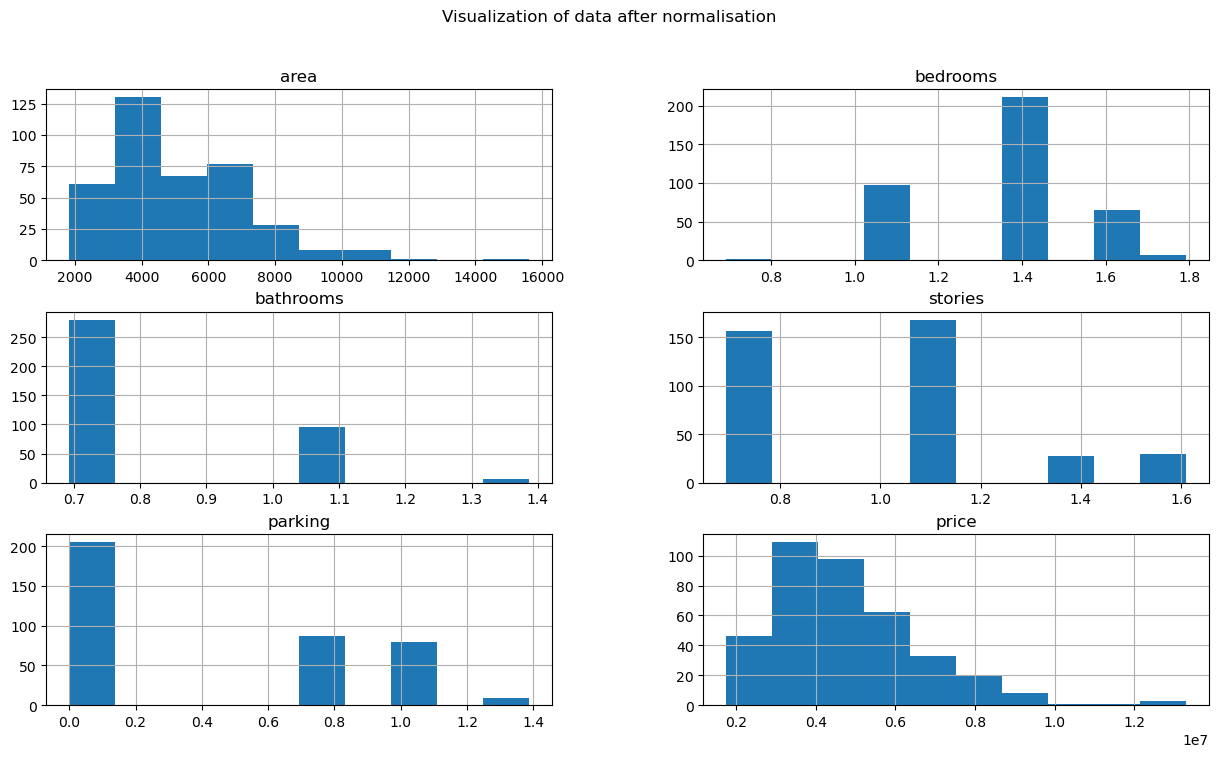

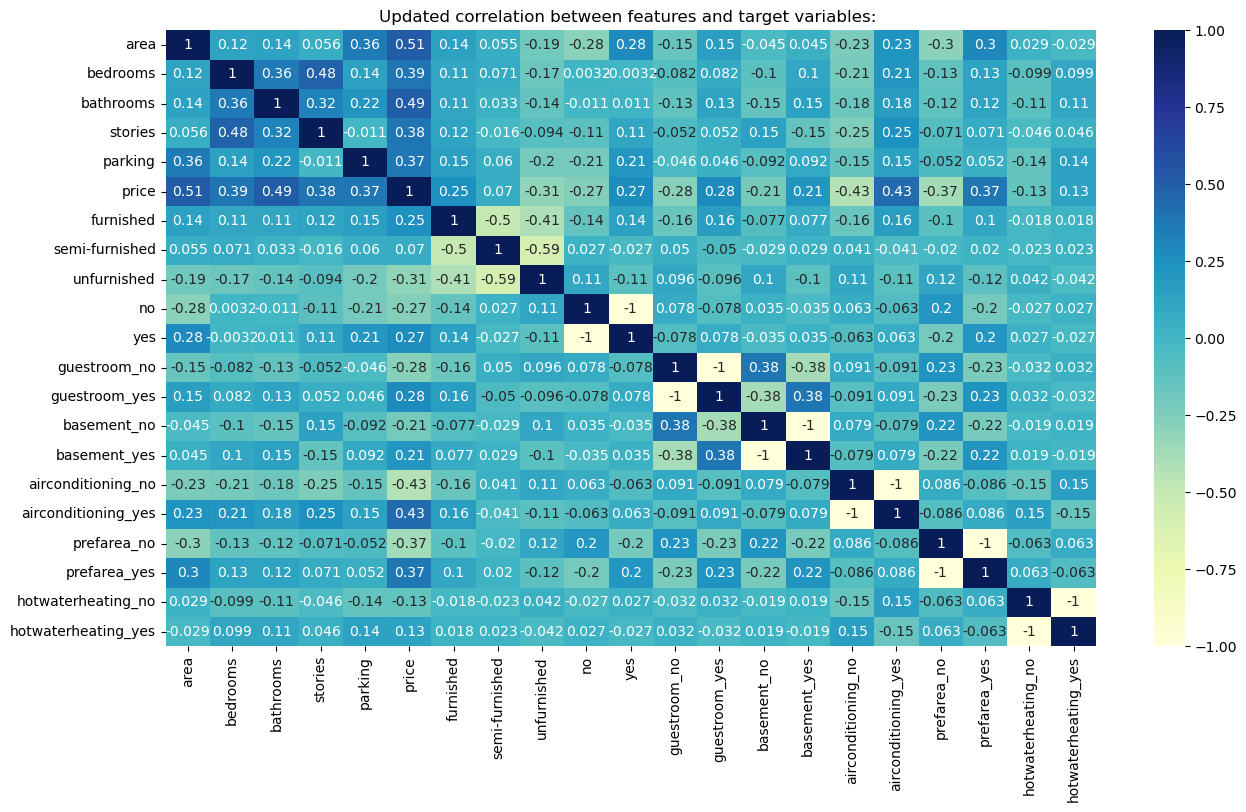

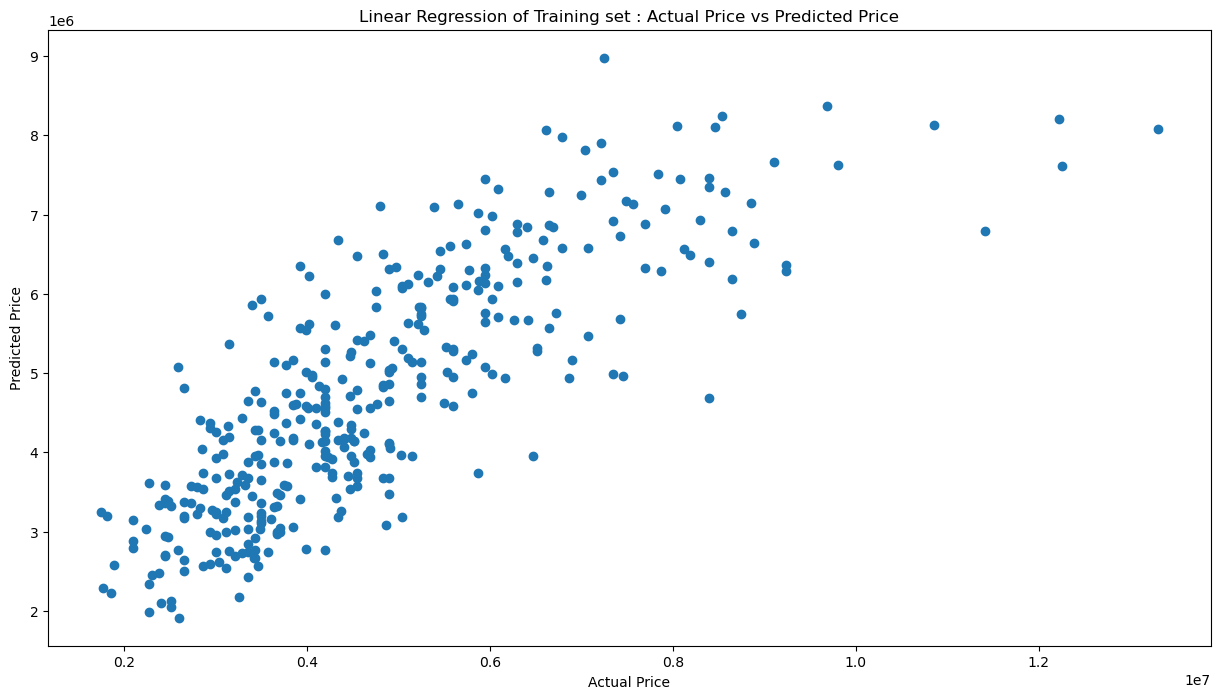

The r2-score of train set is : 0.657036290212731



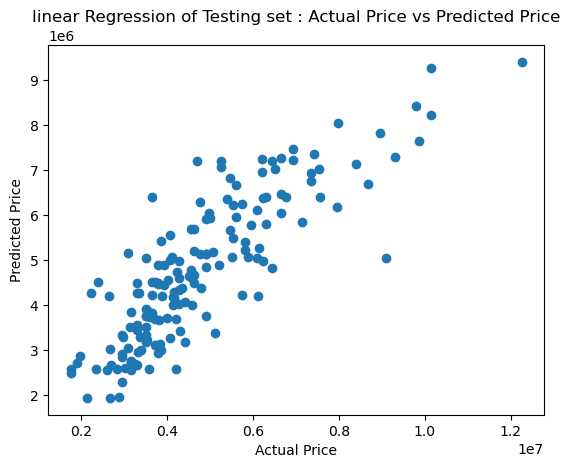

The r2-score of test set is : 0.7148768580602479
The intercept is : 429003.02130721044

The Coefficients are : [ 2.50269166e+02  4.79048604e+05  2.43165972e+06  1.19913845e+06
  4.18058135e+05  1.63479047e+05  1.03729830e+05 -2.67208877e+05
 -2.38050417e+05  2.38050417e+05 -2.04229896e+05  2.04229896e+05
 -1.64358217e+05  1.64358217e+05 -4.59355167e+05  4.59355167e+05
 -3.44804470e+05  3.44804470e+05 -6.09545417e+05  6.09545417e+05]

Root Mean Squared Error: 994498.8157619027
Mean Absolute Error: 742946.6644062642
Best parameters:  {'alpha': 0.0001}


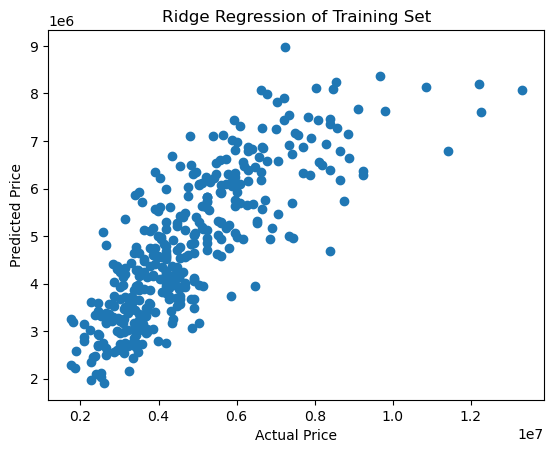

Training accuracy with ridge is 0.6570362902091726
r2 score is : 0.6570362902091726



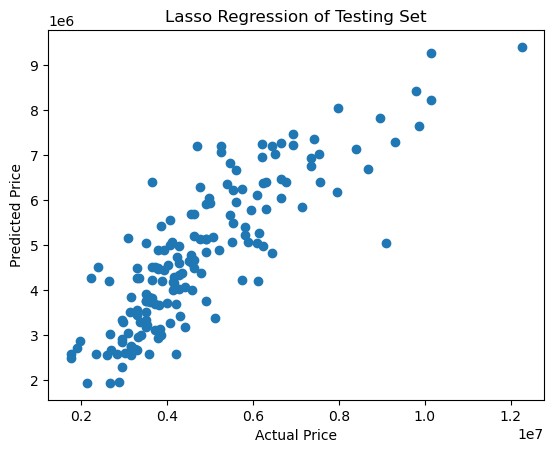

Testing accuracy with lasso is : 0.7148767937952825
r2 score is : 0.7148767937952825



In [29]:
# Name: OOI WEI YING
# Matrics Number: 22056924
# Occ: 4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#data analysis
data = pd.read_csv("C:/Users/wei ying/Downloads/House Pricing.csv")
print("The information of data: ")
print(data)
data.info()
print()

# Check missing values
data.isnull().sum()

# Split into X (features) and y(target variable)
x = data.drop(['price'], axis = 1)
y = data['price']
print("Split the data into X(feature) and y (target variable)")
print("X: ")
print(x)
print()
print("Y: ")
print(y)
print()

# Split data into training set and testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

# joining x training data with y training data
train_data = x_train.join(y_train)
train_data
train_data.hist(figsize = (15,8))
plt.suptitle("Visualization of data")

# find correlation
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(numeric_only = True), annot = True, cmap = "YlGnBu")
plt.title("The correlation between features and target variables")

# data processing
# take logarithm of the features
train_data['bedrooms'] = np.log(train_data['bedrooms'] + 1)
train_data['bathrooms'] = np.log(train_data['bathrooms'] + 1)
train_data['stories'] = np.log(train_data['stories'] + 1)
train_data['parking'] = np.log(train_data['parking'] + 1)
train_data.hist(figsize = (15,8))
plt.suptitle("Visualization of data after normalisation")
print()

# turn string-valued features into numerical value
print("Turn String-valued features into numerical value:")
print(train_data.mainroad.value_counts())
print(train_data.guestroom.value_counts())
print(train_data.basement.value_counts())
print(train_data.hotwaterheating.value_counts())
print(train_data.airconditioning.value_counts())
print(train_data.prefarea.value_counts())
print(train_data.furnishingstatus.value_counts())
print()

print("Joining the numerical-valued features into train data and drop the string-valued features: ")
train_data = train_data.join(pd.get_dummies(train_data.furnishingstatus)).drop(['furnishingstatus'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.mainroad)).drop(['mainroad'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.guestroom, prefix='guestroom')).drop(['guestroom'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.basement, prefix = 'basement')).drop(['basement'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.airconditioning, prefix = 'airconditioning')).drop(['airconditioning'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.prefarea, prefix = 'prefarea')).drop(['prefarea'], axis = 1)
train_data = train_data.join(pd.get_dummies(train_data.hotwaterheating, prefix = 'hotwaterheating')).drop(['hotwaterheating'], axis = 1)
print(train_data)

plt.figure(figsize = (15,8))
plt.title("Updated correlation between features and target variables: ")
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

# visualize coordinates
plt.figure(figsize = (15, 8))

# Linear Regression

#Features Scaling
#scaler = StandardScaler()
#x_train_s = scaler.fit_transform(x_train)

x_train, y_train = train_data.drop(['price'],axis = 1), train_data['price']

reg = LinearRegression()
reg.fit(x_train, y_train)
training_accuracy = reg.score(x_train, y_train)
print(f"Training accuracy is : {training_accuracy}")

# Do prediction with train set
y_pred_train = reg.predict(x_train)
print("Prediction with train set:")
print(y_pred_train)
print()

# Do visualisation of Actual Price against Predicted Price
plt.scatter(y_train, y_pred_train)
plt.title("Linear Regression of Training set : Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Do evaluation with r2 score
r2 = r2_score(y_train, y_pred_train)
print(f"The r2-score of train set is : {r2}")
print()

LinearRegression()

test_data = x_test.join(y_test)

test_data['bedrooms'] = np.log(test_data['bedrooms'] + 1)
test_data['bathrooms'] = np.log(test_data['bathrooms'] + 1)
test_data['stories'] = np.log(test_data['stories'] + 1)
test_data['parking'] = np.log(test_data['parking'] + 1)
test_data = test_data.join(pd.get_dummies(test_data.furnishingstatus)).drop(['furnishingstatus'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.mainroad)).drop(['mainroad'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.guestroom, prefix='guestroom')).drop(['guestroom'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.basement, prefix = 'basement')).drop(['basement'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.airconditioning, prefix = 'airconditioning')).drop(['airconditioning'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.prefarea, prefix = 'prefarea')).drop(['prefarea'], axis = 1)
test_data = test_data.join(pd.get_dummies(test_data.hotwaterheating, prefix = 'hotwaterheating')).drop(['hotwaterheating'], axis = 1)

test_data

x_test, y_test = test_data.drop(['price'],axis = 1), test_data['price']

# Now do evaluation using the test set
y_pred_test = reg.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.title("linear Regression of Testing set : Actual Price vs Predicted Price")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Evaluation of test set
r2 = r2_score(y_test, y_pred_test)
print(f"The r2-score of test set is : {r2}")

# Find intercept
c = reg.intercept_
print(f"The intercept is : {c}")
print()

# Find coefficients
m = reg.coef_
print(f"The Coefficients are : {m}")
print()

# evaluate the model using root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:', rmse)

# evaluate the model using mean absolute error
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', mae)

# Experiment with different hyperparameter (regularization)
# Using ridge and lasso regression
from sklearn import linear_model

# Define the hyperparameter grid
param_grid = {'alpha': [0.000001,0.00001,0.0001]}

# Create a Ridge regression object
ridge = linear_model.Ridge()

# Create a grid search object
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')

# Fit the grid search object to the data
grid_search.fit(x_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)

best_ridge = grid_search.best_estimator_

# Show visualisation of training set
y_pred_train = best_ridge.predict(x_train)
plt.scatter(y_train, y_pred_train)
plt.title("Ridge Regression of Training Set")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Accuracy of training set
training_ridge = best_ridge.score(x_train, y_train)
r2_train = r2_score(y_train, y_pred_train)
print(f"Training accuracy with ridge is {training_ridge}")
print(f"r2 score is : {r2_train}")
print()

# Show visualisation of testing set
y_pred_test = best_ridge.predict(x_test)
plt.scatter(y_test, y_pred_test)
plt.title("Lasso Regression of Testing Set")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

# Accuracy of testing set
accuracy_lasso = best_ridge.score(x_test, y_test)
r2_test = r2_score(y_test, y_pred_test)
print(f"Testing accuracy with lasso is : {accuracy_lasso}")
print(f"r2 score is : {r2_test}")
print()